## Three Stock Monte

This exercise tests your ability to retrieve stock price data using the Alpaca API and simulate multiple portfolio compositions using Monte Carlo Simulation.

Instructions:

1. Review the libraries and dependencies that have been imported into the `three_stock_monte.ipynb` notebook. Note that the MCSimulation tools have been imported into the notebook via the MCForecastTools library. The `Unsolved` folder includes the MCForecastTools library as a Python file .

2. Create an environment file (`.env`) in the `Unsolved` folder. Include variables for `ALPACA_API_KEY` and `ALPACA_SECRET_KEY` in this file for accessing the Alpaca API.

3. Load the environment variables into `three_stock_monte.ipynb`, and then import the Alpaca API and secret keys.

4. Set up the Alpaca API `REST` object. Make sure that this object includes your Alpaca API key, your Alpaca secret key, and a reference to the version that you’re using.

5. Use the Alpaca SDK to make an Alpaca API call that gets three years of daily historical price data for the following three stocks:

    - `NKE` (Nike)

    - `T` (AT&T)

    - `XOM` (Exxon Mobil)

6. Create an instance of MCSimulation with the following parameters that simulates the next five years of portfolio returns:

    - `weights`: Set this parameter to `[.33,.33,.33]` to evenly invest across all three stocks.

    - `num_simulation`: Set this parameter to `1000` to ensure the reliability of your simulation. If your computer struggles to run 1000 simulations, change the parameter value to 500.

    - `num_trading_days`: Set this parameter to `252*5` to simulate five years of trading days.

7. Run the Monte Carlo simulation. Using MCSimulation functions, visualize the simulation results by using both an overlay line plot and a histogram. Generate the summary statistics for the simulation, too.

8. Using a 95% confidence interval and your initial investment of $15,000, determine the lower and upper bounds of the expected cumulative-return value of your portfolio after five years of growth.

9. Create a second instance of MCSimulation with the same parameters, but set the `weights` parameter to `[.20,.60,.20]` to represent a portfolio with a majority of AT&T stock.

10. Run the Monte Carlo simulation with the new weights. Then use MCSimulation functions to do the following:

    - Visualize the simulation results by using both an overlay line plot and a histogram.

    - Generate the summary statistics for this new simulation.

    - Using a 95% confidence interval and your initial investment of $15,000, determine the lower and upper bounds of the expected cumulative-return value of your portfolio after five years of growth.

11. Create a third instance of MCSimulation with the same parameters, but set the `weights` variable to `[.60,.20,.20]` to represent a portfolio with a majority of Nike stock.

12. Run the Monte Carlo simulation with the new weights. Then use MCSimulation functions to do the following:

    - Visualize the simulation results by using both an overlay line plot and a histogram.

    - Generate the summary statistics for this new simulation.

    - Using a 95% confidence interval and your initial investment of $15,000, determine the lower and upper bounds of the expected cumulative-return value of your portfolio after five years of growth.

13. Create a fourth instance of MCSimulation with the same parameters, but set the `weights` variable to `[.20,.20,.60]` to represent a portfolio with a majority of Exxon stock.

14. Run the Monte Carlo simulation with the new weights. Using a 95% confidence interval and your initial investment of $15,000, determine the lower and upper bounds of the expected cumulative-return value of your portfolio after five years of growth.

15. Review all four simulated portfolios, and determine which set of investments gives you the best chance of a profit. In your notebook, write which portfolio you choose, and why.

References:

[Alpaca API Docs](https://alpaca.markets/docs/api-documentation/)


## Step 1: Review the libraries and dependencies that have been imported into the `three_stock_monte.ipynb` notebook. Note that the MCSimulation tools have been imported into the notebook via the MCForecastTools library. The `Unsolved` folder includes the MCForecastTools library as a Python file .

In [1]:
# Import libraries and dependencies
import os
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

## Step 2: Create an environment file (`.env`) in the `Unsolved` folder. Include variables for `ALPACA_API_KEY` and `ALPACA_SECRET_KEY` in this file for accessing the Alpaca API

## Step 3: Load the environment variables into `three_stock_monte.ipynb`, and then import the Alpaca API and secret keys.

* Load the environment variable by calling the `load_dotenv()` function.
* Set the value of the variables `alpaca_api_key` and `alpaca_secret_key` equal to their respective environment variables. 
* Confirm the variables are available by checking the `type` of each. 

In [2]:
# Load the environment variables by calling the load_dotenv function
load_dotenv()

True

In [3]:
# Set Alpaca API key and secret by calling the os.getenv function and referencing the environment variable names
# Set each environment variable to a notebook variable of the same name
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Check the values were imported correctly by evaluating the type of each
display(type(alpaca_api_key))
display(type(alpaca_secret_key))

str

str

## Step 4: Set up the Alpaca API `REST` object. Make sure that this object includes your Alpaca API key, your Alpaca secret key, and a reference to the version that you’re using.

In [4]:
# Create your Alpaca API REST object by calling Alpaca's tradeapi.REST function
# Set the parameters to your alpaca_api_key, alpaca_secret_key and api_version="v2" 
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

## Step 5:  Use the Alpaca SDK to make an Alpaca API call that gets three years of daily historical price data for the following three stocks: NKE, T, and XOM.

* Create the list for the required `tickers`.
* Set the values for `start_date` and `end_date` using the `pd.Timestamp` function. The dates should be 2017-05-01 through 2020-05-01.
* Set the `timeframe` value to 1 day.
* Create the `portfolio_prices_df` DataFrame by setting it equal to the `alpaca.get_bars` function. 


In [5]:
# Create the list for the required tickers
tickers = ["NKE", "T", "XOM"]

In [6]:
# Set the values for start_date and end_date using the pd.Timestamp function
# Inside the function set the date parameter to the prior business day 
# The start and end data should be 2017-05-01 to 2020-05-01
# Set the parameter tz to "America/New_York", 
# Set this all to the ISO format by calling the isoformat function 
start_date = pd.Timestamp("2017-05-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-05-01", tz="America/New_York").isoformat()

In [7]:
# Set timeframe to one day (1Day)
timeframe = "1Day"

In [8]:
# Use the Alpaca get_bars function to gather the price information for each ticker
# Include the function parameters: tickers, timeframe, start, end, and limit
# Be sure to call the df property to ensure that the returned information is set as a DataFrame
prices_df = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Reorganize the DataFrame
# Separate ticker data
NKE = prices_df[prices_df['symbol']=='NKE'].drop('symbol', axis=1)
T = prices_df[prices_df['symbol']=='T'].drop('symbol', axis=1)
XOM = prices_df[prices_df['symbol']=='XOM'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
prices_df = pd.concat([NKE, T, XOM], axis=1, keys=["NKE", "T", "XOM"])

# Review the first five rows of the resulting DataFrame 
prices_df.head()

NKE                                             \
                            open   high    low  close    volume trade_count   
timestamp                                                                     
2017-05-01 04:00:00+00:00  55.40  55.45  54.98  54.99   4881442       30491   
2017-05-02 04:00:00+00:00  55.16  55.16  54.79  55.07   7363885       41589   
2017-05-03 04:00:00+00:00  55.17  55.30  54.40  54.53   9486619       48477   
2017-05-04 04:00:00+00:00  54.69  54.83  54.20  54.47   6830628       39260   
2017-05-05 04:00:00+00:00  54.49  54.50  53.56  53.95  13379949       57959   

                                          T                ...            \
                                vwap   open   high    low  ...    volume   
timestamp                                                  ...             
2017-05-01 04:00:00+00:00  55.201737  39.69  39.70  39.06  ...  24750447   
2017-05-02 04:00:00+00:00  54.967165  39.15  39.22  38.88  ...  24852467   
2017-05-03 04:00:00+00:00  54.622933  38.94  38.98  38.15  ...  33743554   
2017-05-04 04:00:00+00:00  54.501544  38.38  38.41  37.63  ...  31450002   
2017-05-05 04:00:00+00:00  53.889567  38.06  38.71  38.03  ...  21829853   

                                                    XOM                  \
                          trade_count       vwap   open     high    low   
timestamp                                                                 
2017-05-01 04:00:00+00:00       95238  39.278779  81.56  82.2100  81.48   
2017-05-02 04:00:00+00:00       86237  38.996448  82.17  82.5900  81.90   
2017-05-03 04:00:00+00:00      113920  38.423685  81.97  83.0699  81.91   
2017-05-04 04:00:00+00:00      118191  37.965109  82.28  82.3600  81.40   
2017-05-05 04:00:00+00:00       82070  38.424403  81.63  82.2350  81.61   

                                                                   
                           close    volume trade_count       vwap  
timestamp                                                          
2017-05-01 04:00:00+00:00  82.06   8664579       49226  81.941004  
2017-05-02 04:00:00+00:00  82.05   9102893       54234  82.197909  
2017-05-03 04:00:00+00:00  82.70  10289447       57309  82.625679  
2017-05-04 04:00:00+00:00  81.64  16165093       86289  81.729800  
2017-05-05 04:00:00+00:00  82.02  10212004       59397  81.932657  

[5 rows x 21 columns]

## Step 6:  Create an instance of MCSimulation with the following parameters that simulates the next five years of portfolio returns:

* `weights`: Set this parameter to `[.33,.33,.33]` to evenly invest across all three stocks.
* `num_simulation`: Set this parameter to `1000` to ensure the reliability of your simulation. If your computer struggles to run 1000 simulations, change the parameter value to 500.
* `num_trading_days`: Set this parameter to `252*5` to simulate five years of trading days.


In [9]:
# Configure a Monte Carlo simulation to forecast five years cumulative returns
# Use an even weight of .33 across all 3 stocks
MC_even_weight = MCSimulation(
    portfolio_data = prices_df,
    weights = [.33,.33,.33],
    num_simulation = 1000,
    num_trading_days = 252*5
)

# Printing the first five rows of the simulation input data
MC_even_weight.portfolio_data.head()

NKE                                             \
                            open   high    low  close    volume trade_count   
timestamp                                                                     
2017-05-01 04:00:00+00:00  55.40  55.45  54.98  54.99   4881442       30491   
2017-05-02 04:00:00+00:00  55.16  55.16  54.79  55.07   7363885       41589   
2017-05-03 04:00:00+00:00  55.17  55.30  54.40  54.53   9486619       48477   
2017-05-04 04:00:00+00:00  54.69  54.83  54.20  54.47   6830628       39260   
2017-05-05 04:00:00+00:00  54.49  54.50  53.56  53.95  13379949       57959   

                                                       T         ...  \
                                vwap daily_return   open   high  ...   
timestamp                                                        ...   
2017-05-01 04:00:00+00:00  55.201737          NaN  39.69  39.70  ...   
2017-05-02 04:00:00+00:00  54.967165     0.001455  39.15  39.22  ...   
2017-05-03 04:00:00+00:00  54.622933    -0.009806  38.94  38.98  ...   
2017-05-04 04:00:00+00:00  54.501544    -0.001100  38.38  38.41  ...   
2017-05-05 04:00:00+00:00  53.889567    -0.009547  38.06  38.71  ...   

                                                     XOM                  \
                                vwap daily_return   open     high    low   
timestamp                                                                  
2017-05-01 04:00:00+00:00  39.278779          NaN  81.56  82.2100  81.48   
2017-05-02 04:00:00+00:00  38.996448    -0.003836  82.17  82.5900  81.90   
2017-05-03 04:00:00+00:00  38.423685    -0.014121  81.97  83.0699  81.91   
2017-05-04 04:00:00+00:00  37.965109    -0.010156  82.28  82.3600  81.40   
2017-05-05 04:00:00+00:00  38.424403     0.014470  81.63  82.2350  81.61   

                                                                                
                           close    volume trade_count       vwap daily_return  
timestamp                                                                       
2017-05-01 04:00:00+00:00  82.06   8664579       49226  81.941004          NaN  
2017-05-02 04:00:00+00:00  82.05   9102893       54234  82.197909    -0.000122  
2017-05-03 04:00:00+00:00  82.70  10289447       57309  82.625679     0.007922  
2017-05-04 04:00:00+00:00  81.64  16165093       86289  81.729800    -0.012817  
2017-05-05 04:00:00+00:00  82.02  10212004       59397  81.932657     0.004655  

[5 rows x 24 columns]

# Step 7: Run the Monte Carlo simulation. Using MCSimulation functions, visualize the simulation results by using both an overlay line plot and a histogram. Generate the summary statistics for the simulation, too.

In [10]:
# Run a Monte Carlo simulation to forecast five years cumulative returns
MC_even_weight.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/pdenormandie/Desktop/Quandl_API_Key/01-Three_Stock_Monte/Solved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997702,1.019094,0.992993,1.001695,1.001487,1.012050,0.984924,0.989585,0.980118,0.999129,...,0.988357,0.990137,0.996201,1.005046,1.002662,0.987982,0.982133,1.003432,0.988570,1.008756
2,0.991054,1.011361,1.000865,1.009167,1.000107,1.017866,0.978271,0.993145,0.986827,0.993457,...,0.979139,0.991346,0.987320,1.003379,1.003612,0.997134,0.962609,1.000329,0.988253,1.013805
3,0.978484,1.006157,0.996029,1.005899,0.975942,1.013772,0.972859,0.978627,0.989620,1.014152,...,0.974321,0.996501,1.000988,0.991096,0.999692,0.999425,0.971336,0.990215,0.990846,1.008178
4,0.975837,1.007245,1.011111,0.983471,0.965918,1.019709,0.964890,0.981156,0.988284,1.001041,...,0.981002,0.994670,1.017706,0.973609,0.997882,1.003580,0.972887,1.009592,0.987763,1.003451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.896466,0.960206,1.368242,0.622836,0.961185,1.030062,0.646154,0.922635,0.644562,0.988110,...,0.676670,0.729698,0.921955,1.867818,0.895134,0.975691,0.960608,0.639346,1.372954,1.162718
1257,0.897110,0.981112,1.354295,0.630597,0.964715,1.025701,0.649425,0.923259,0.645156,1.000830,...,0.680574,0.738615,0.931367,1.861318,0.902430,0.981413,0.957315,0.647098,1.390293,1.159144
1258,0.900615,0.986599,1.357140,0.632355,0.960477,1.041739,0.653655,0.928950,0.648134,1.015622,...,0.676711,0.735642,0.934293,1.866440,0.912603,0.978111,0.952947,0.631898,1.383403,1.162287
1259,0.892075,0.978957,1.358628,0.635739,0.965082,1.030606,0.655147,0.936058,0.660141,1.020895,...,0.673938,0.731455,0.931531,1.871059,0.907481,0.989798,0.945702,0.634775,1.357473,1.182407


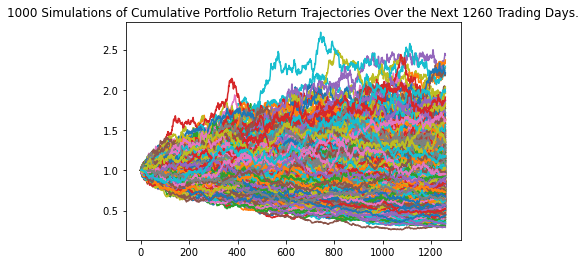

In [11]:
# Visualize the Monte Carlo simulation by creating an
# overlay line plot
even_weight_line_plot = MC_even_weight.plot_simulation()

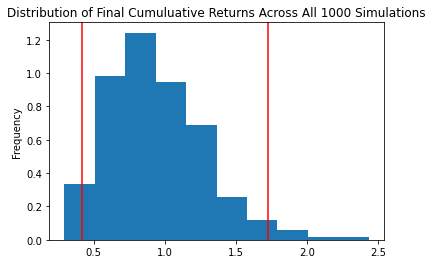

In [12]:
# Visualize the Monte Carlo simulation by creating a histogram
even_weight_distribution_plot = MC_even_weight.plot_distribution()

In [13]:
# Generate the summary statistics for the Monte Carlo simulation
# Save the summary statistics information in a variable called even_weights_table 
even_weight_table = MC_even_weight.summarize_cumulative_return()

# Print the table of summary statistics
print(even_weight_table)

count           1000.000000
mean               0.938045
std                0.340942
min                0.292525
25%                0.681799
50%                0.881544
75%                1.147509
max                2.433929
95% CI Lower       0.414971
95% CI Upper       1.725652
Name: 1260, dtype: float64


## Step 8: Using a 95% confidence interval and your initial investment of 15,000, determine the lower and upper bounds of the expected cumulative-return value of your portfolio after five years of growth.

In [14]:
# Using the lower and upper `95%` confidence interval values 
# (index positions 8 & 9 from the even_weight_table)
# calculate  the range of the possible outcomes for a $15,000 investment 
even_ci_lower = round(even_weight_table[8]*15000,2)
even_ci_upper = round(even_weight_table[9]*15000,2)

# Print results of your calculations
print(f"There is a 95% chance that an initial investment of $15,000 in the portfolio"
      f" with an even weight portfolio over the next 5 years will end within in the range of"
      f" ${even_ci_lower} and ${even_ci_upper}.")

There is a 95% chance that an initial investment of $15,000 in the portfolio with an even weight portfolio over the next 5 years will end within in the range of $6224.57 and $25884.78.


## Step 9: Create a second instance of MCSimulation with the same parameters, but set the `weights` parameter to `[.20,.60,.20]` to represent a portfolio with a majority of AT&T stock.

In [15]:
# Configure a Monte Carlo simulation to forecast five years cumulative returns 
# Use a weight of .60 for AT&T and .20 for the remaining 2 stocks
MC_att = MCSimulation(
    portfolio_data = prices_df,
    weights = [.20,.60,.20],
    num_simulation = 1000,
    num_trading_days = 252*5)

# Printing the first five rows of the simulation input data
MC_att.portfolio_data.head()

NKE                                             \
                            open   high    low  close    volume trade_count   
timestamp                                                                     
2017-05-01 04:00:00+00:00  55.40  55.45  54.98  54.99   4881442       30491   
2017-05-02 04:00:00+00:00  55.16  55.16  54.79  55.07   7363885       41589   
2017-05-03 04:00:00+00:00  55.17  55.30  54.40  54.53   9486619       48477   
2017-05-04 04:00:00+00:00  54.69  54.83  54.20  54.47   6830628       39260   
2017-05-05 04:00:00+00:00  54.49  54.50  53.56  53.95  13379949       57959   

                                                       T         ...  \
                                vwap daily_return   open   high  ...   
timestamp                                                        ...   
2017-05-01 04:00:00+00:00  55.201737          NaN  39.69  39.70  ...   
2017-05-02 04:00:00+00:00  54.967165     0.001455  39.15  39.22  ...   
2017-05-03 04:00:00+00:00  54.622933    -0.009806  38.94  38.98  ...   
2017-05-04 04:00:00+00:00  54.501544    -0.001100  38.38  38.41  ...   
2017-05-05 04:00:00+00:00  53.889567    -0.009547  38.06  38.71  ...   

                                                     XOM                  \
                                vwap daily_return   open     high    low   
timestamp                                                                  
2017-05-01 04:00:00+00:00  39.278779          NaN  81.56  82.2100  81.48   
2017-05-02 04:00:00+00:00  38.996448    -0.003836  82.17  82.5900  81.90   
2017-05-03 04:00:00+00:00  38.423685    -0.014121  81.97  83.0699  81.91   
2017-05-04 04:00:00+00:00  37.965109    -0.010156  82.28  82.3600  81.40   
2017-05-05 04:00:00+00:00  38.424403     0.014470  81.63  82.2350  81.61   

                                                                                
                           close    volume trade_count       vwap daily_return  
timestamp                                                                       
2017-05-01 04:00:00+00:00  82.06   8664579       49226  81.941004          NaN  
2017-05-02 04:00:00+00:00  82.05   9102893       54234  82.197909    -0.000122  
2017-05-03 04:00:00+00:00  82.70  10289447       57309  82.625679     0.007922  
2017-05-04 04:00:00+00:00  81.64  16165093       86289  81.729800    -0.012817  
2017-05-05 04:00:00+00:00  82.02  10212004       59397  81.932657     0.004655  

[5 rows x 24 columns]

## Step 10: Run the Monte Carlo simulation with the new weights. Then use MCSimulation functions to do the following:

* Visualize the simulation results by using both an overlay line plot and a histogram.
* Generate the summary statistics for this new simulation.
* Using a 95% confidence interval and your initial investment of 15,000, determine the lower and upper bounds of the expected cumulative-return value of your portfolio after five years of growth.


In [16]:
# Run a Monte Carlo simulation to forecast five years cumulative returns 
# with 60% AT&T (ticker: T) stock
MC_att.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/pdenormandie/Desktop/Quandl_API_Key/01-Three_Stock_Monte/Solved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002772,1.002409,1.030219,1.010005,1.004589,1.004664,1.001386,1.000565,0.992598,0.998730,...,0.996240,0.972024,0.991974,1.010514,0.985717,0.999327,1.018068,0.986285,1.001795,1.007734
2,0.986181,1.009272,1.029155,0.990626,0.999800,1.006150,1.002193,1.007632,0.987707,1.011325,...,1.000588,0.980340,0.984760,1.019006,0.968728,1.004563,1.024313,0.973979,0.986969,1.001949
3,0.982949,1.029092,1.028948,0.993771,1.013149,1.010914,1.005779,1.026400,1.011190,1.026026,...,1.012742,0.970894,0.984902,1.013761,0.975111,1.005387,1.042010,0.960174,0.996379,0.990851
4,0.975562,1.046868,1.019898,1.008098,1.019629,1.031025,1.007161,1.039968,1.007419,1.024882,...,1.005890,0.963329,0.994410,1.022642,0.981214,1.000474,1.064174,0.952018,0.992598,0.986635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.640456,0.431098,0.950238,0.738226,0.834933,0.649036,0.794229,0.844508,0.779962,1.083448,...,0.624397,0.459932,0.629262,1.271574,0.584266,0.417484,0.965135,0.709092,1.155268,1.203698
1257,0.637195,0.429458,0.959101,0.732597,0.841702,0.659800,0.800216,0.846257,0.778683,1.072363,...,0.633898,0.460509,0.625508,1.290424,0.582879,0.420093,0.981716,0.700471,1.157299,1.191891
1258,0.641120,0.426183,0.944196,0.716192,0.843450,0.665918,0.795188,0.847229,0.797158,1.071539,...,0.625650,0.461723,0.637614,1.298659,0.579974,0.418900,0.982762,0.695707,1.151778,1.192870
1259,0.647391,0.424240,0.949289,0.728682,0.843036,0.659796,0.787376,0.838672,0.794766,1.065454,...,0.624966,0.460739,0.630835,1.279869,0.579671,0.429992,1.000418,0.686915,1.153784,1.197716


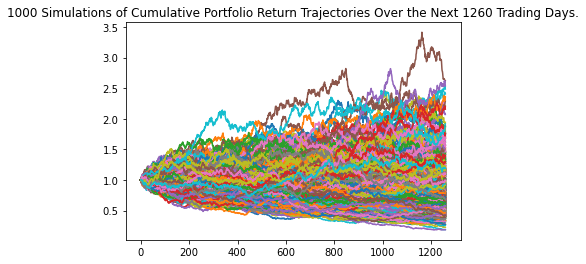

In [17]:
# Visualize the Monte Carlo simulation for a majority weight in AT&T
# by creating an overlay line plot
att_line_plot = MC_att.plot_simulation()

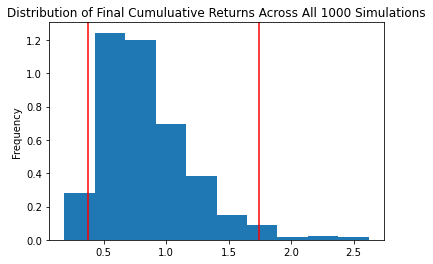

In [18]:
# Visualize the Monte Carlo simulation for a majority weight in AT&T
# by creating a histogram
att_dist_plot = MC_att.plot_distribution()

In [19]:
# Generate the summary statistics for the Monte Carlo simulation with
# majority weight in AT&T
# Save the summary statistics information in a variable called att_table 
att_table = MC_att.summarize_cumulative_return()

# Print summary statistics
print(att_table)

count           1000.000000
mean               0.846181
std                0.358033
min                0.185549
25%                0.593916
50%                0.768965
75%                1.049226
max                2.620700
95% CI Lower       0.377732
95% CI Upper       1.746836
Name: 1260, dtype: float64


In [20]:
# Using the lower and upper `95%` confidence interval values 
# (index positions 8 & 9 from the att_table)
# calculate  the range of the possible outcomes for a $15,000 investment 
att_ci_lower = round(att_table[8]*15000,2)
att_ci_upper = round(att_table[9]*15000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $15,000 in the portfolio"
      f" with a 60% weight in AT&T over the next 5 years will end within in the range of"
      f" ${att_ci_lower} and ${att_ci_upper}.")

There is a 95% chance that an initial investment of $15,000 in the portfolio with a 60% weight in AT&T over the next 5 years will end within in the range of $5665.98 and $26202.54.


## Step 11: Create a third instance of MCSimulation with the same parameters, but set the `weights` variable to `[.60,.20,.20]` to represent a portfolio with a majority of Nike stock.

In [21]:
# Configure a Monte Carlo simulation to forecast five years cumulative returns
# Use a weight of .60 for Nike and .20 for the remaining 2 stocks
MC_nike = MCSimulation(
    portfolio_data = prices_df,
    weights = [.60,.20,.20],
    num_simulation = 1000,
    num_trading_days = 252*5
)

# Printing the first five rows of the simulation input data
MC_nike.portfolio_data.head()

NKE                                             \
                            open   high    low  close    volume trade_count   
timestamp                                                                     
2017-05-01 04:00:00+00:00  55.40  55.45  54.98  54.99   4881442       30491   
2017-05-02 04:00:00+00:00  55.16  55.16  54.79  55.07   7363885       41589   
2017-05-03 04:00:00+00:00  55.17  55.30  54.40  54.53   9486619       48477   
2017-05-04 04:00:00+00:00  54.69  54.83  54.20  54.47   6830628       39260   
2017-05-05 04:00:00+00:00  54.49  54.50  53.56  53.95  13379949       57959   

                                                       T         ...  \
                                vwap daily_return   open   high  ...   
timestamp                                                        ...   
2017-05-01 04:00:00+00:00  55.201737          NaN  39.69  39.70  ...   
2017-05-02 04:00:00+00:00  54.967165     0.001455  39.15  39.22  ...   
2017-05-03 04:00:00+00:00  54.622933    -0.009806  38.94  38.98  ...   
2017-05-04 04:00:00+00:00  54.501544    -0.001100  38.38  38.41  ...   
2017-05-05 04:00:00+00:00  53.889567    -0.009547  38.06  38.71  ...   

                                                     XOM                  \
                                vwap daily_return   open     high    low   
timestamp                                                                  
2017-05-01 04:00:00+00:00  39.278779          NaN  81.56  82.2100  81.48   
2017-05-02 04:00:00+00:00  38.996448    -0.003836  82.17  82.5900  81.90   
2017-05-03 04:00:00+00:00  38.423685    -0.014121  81.97  83.0699  81.91   
2017-05-04 04:00:00+00:00  37.965109    -0.010156  82.28  82.3600  81.40   
2017-05-05 04:00:00+00:00  38.424403     0.014470  81.63  82.2350  81.61   

                                                                                
                           close    volume trade_count       vwap daily_return  
timestamp                                                                       
2017-05-01 04:00:00+00:00  82.06   8664579       49226  81.941004          NaN  
2017-05-02 04:00:00+00:00  82.05   9102893       54234  82.197909    -0.000122  
2017-05-03 04:00:00+00:00  82.70  10289447       57309  82.625679     0.007922  
2017-05-04 04:00:00+00:00  81.64  16165093       86289  81.729800    -0.012817  
2017-05-05 04:00:00+00:00  82.02  10212004       59397  81.932657     0.004655  

[5 rows x 24 columns]

## Step 12: Run the Monte Carlo simulation with the new weights. Then use MCSimulation functions to do the following:

*Visualize the simulation results by using both an overlay line plot and a histogram.
* Generate the summary statistics for this new simulation.
* Using a 95% confidence interval and your initial investment of 15,000, determine the lower and upper bounds of the expected cumulative-return value of your portfolio after five years of growth.

In [22]:
# Run a Monte Carlo simulation to forecast five years cumulative returns 
# with 60% Nike (ticker: NKE) stock
MC_nike.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/pdenormandie/Desktop/Quandl_API_Key/01-Three_Stock_Monte/Solved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.012445,1.009512,1.004824,0.988849,1.018249,0.998017,1.029791,0.975379,0.972811,0.970776,...,1.032987,1.002586,0.973527,1.013463,0.999332,1.005174,0.994352,1.007335,0.993448,0.995509
2,1.007991,1.003348,1.009149,0.975032,1.009895,1.014402,1.027550,0.974388,0.980972,0.990550,...,1.037532,1.019053,0.971868,0.993101,1.008308,0.999321,0.997141,0.976868,0.996243,0.995044
3,1.031492,0.995127,1.003430,1.002111,1.017971,0.995245,1.006769,0.988319,0.990191,0.987774,...,1.027385,1.027360,0.969544,1.006220,1.029865,1.012331,0.991728,0.986426,1.002623,1.002667
4,1.026253,1.022543,1.006102,0.997265,1.013430,1.002227,1.013990,0.989977,0.992316,0.974114,...,1.042183,1.038314,0.960205,0.993696,1.024132,0.998947,0.981612,0.977648,0.989622,1.010786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.074831,0.520497,1.416086,1.190610,0.832600,1.050426,1.187561,1.763642,1.665513,1.414013,...,0.685347,4.176467,0.354504,0.897267,0.920899,1.088965,0.752251,0.633430,1.089675,1.507546
1257,1.087962,0.519844,1.382228,1.201681,0.820354,1.026278,1.185207,1.757537,1.681682,1.416183,...,0.686477,4.151645,0.347235,0.913368,0.921311,1.076933,0.761230,0.630454,1.068285,1.517344
1258,1.092296,0.518831,1.430805,1.199075,0.816717,1.021396,1.165057,1.795465,1.668015,1.405186,...,0.685608,4.188090,0.345578,0.912088,0.928810,1.046904,0.778215,0.632344,1.078213,1.536026
1259,1.087491,0.516353,1.431318,1.215090,0.827174,1.019014,1.182477,1.811608,1.645821,1.384789,...,0.691722,4.262856,0.340056,0.914184,0.915982,1.061932,0.774334,0.611063,1.070399,1.568116


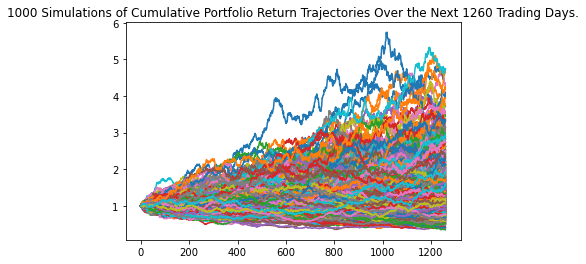

In [23]:
# Visualize the Monte Carlo simulation for a majority weight in Nike
# by creating an overlay line plot
nike_line_plot = MC_nike.plot_simulation()

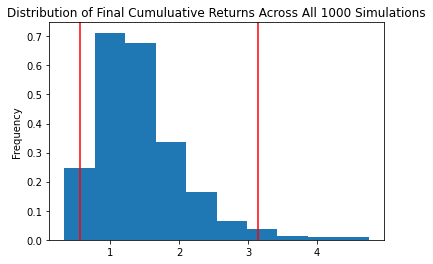

In [24]:
# Visualize the Monte Carlo simulation for a majority weight in Nike
# by creating a histogram
nike_dist_plot = MC_nike.plot_distribution()

In [25]:
# Generate the summary statistics for the Monte Carlo simulation with
# majority weight in Nike
# Save the summary statistics information in a variable called nike_table 
nike_table = MC_nike.summarize_cumulative_return()

# Print summary statistics
print(nike_table)

count           1000.000000
mean               1.432559
std                0.654011
min                0.337265
25%                0.974251
50%                1.311335
75%                1.717175
max                4.745663
95% CI Lower       0.561518
95% CI Upper       3.137943
Name: 1260, dtype: float64


In [26]:
# Using the lower and upper `95%` confidence interval values 
# (index positions 8 & 9 from the nike_table),
# calculate  the range of the possible outcomes for a $15,000 investment 
nike_ci_lower = round(nike_table[8]*15000,2)
nike_ci_upper = round(nike_table[9]*15000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $15,000 in the portfolio"
      f" with a 60% weight in Nike over the next 5 years will end within in the range of"
      f" ${nike_ci_lower} and ${nike_ci_upper}.")

There is a 95% chance that an initial investment of $15,000 in the portfolio with a 60% weight in Nike over the next 5 years will end within in the range of $8422.77 and $47069.14.


## Step 13: Create a fourth instance of MCSimulation with the same parameters, but set the `weights` variable to `[.20,.20,.60]` to represent a portfolio with a majority of Exxon stock.

In [27]:
# Configuring a Monte Carlo simulation to forecast five years cumulative returns
# Use a weight of .60 for XOM and .20 for the remaining 2 stocks
MC_exxon = MCSimulation(
    portfolio_data = prices_df,
    weights = [.20,.20,.60],
    num_simulation = 1000,
    num_trading_days = 252*5)

# Printing the first five rows of the simulation input data
MC_exxon.portfolio_data.head()

NKE                                             \
                            open   high    low  close    volume trade_count   
timestamp                                                                     
2017-05-01 04:00:00+00:00  55.40  55.45  54.98  54.99   4881442       30491   
2017-05-02 04:00:00+00:00  55.16  55.16  54.79  55.07   7363885       41589   
2017-05-03 04:00:00+00:00  55.17  55.30  54.40  54.53   9486619       48477   
2017-05-04 04:00:00+00:00  54.69  54.83  54.20  54.47   6830628       39260   
2017-05-05 04:00:00+00:00  54.49  54.50  53.56  53.95  13379949       57959   

                                                       T         ...  \
                                vwap daily_return   open   high  ...   
timestamp                                                        ...   
2017-05-01 04:00:00+00:00  55.201737          NaN  39.69  39.70  ...   
2017-05-02 04:00:00+00:00  54.967165     0.001455  39.15  39.22  ...   
2017-05-03 04:00:00+00:00  54.622933    -0.009806  38.94  38.98  ...   
2017-05-04 04:00:00+00:00  54.501544    -0.001100  38.38  38.41  ...   
2017-05-05 04:00:00+00:00  53.889567    -0.009547  38.06  38.71  ...   

                                                     XOM                  \
                                vwap daily_return   open     high    low   
timestamp                                                                  
2017-05-01 04:00:00+00:00  39.278779          NaN  81.56  82.2100  81.48   
2017-05-02 04:00:00+00:00  38.996448    -0.003836  82.17  82.5900  81.90   
2017-05-03 04:00:00+00:00  38.423685    -0.014121  81.97  83.0699  81.91   
2017-05-04 04:00:00+00:00  37.965109    -0.010156  82.28  82.3600  81.40   
2017-05-05 04:00:00+00:00  38.424403     0.014470  81.63  82.2350  81.61   

                                                                                
                           close    volume trade_count       vwap daily_return  
timestamp                                                                       
2017-05-01 04:00:00+00:00  82.06   8664579       49226  81.941004          NaN  
2017-05-02 04:00:00+00:00  82.05   9102893       54234  82.197909    -0.000122  
2017-05-03 04:00:00+00:00  82.70  10289447       57309  82.625679     0.007922  
2017-05-04 04:00:00+00:00  81.64  16165093       86289  81.729800    -0.012817  
2017-05-05 04:00:00+00:00  82.02  10212004       59397  81.932657     0.004655  

[5 rows x 24 columns]

## Step 14: Run the Monte Carlo simulation with the new weights. Then use MCSimulation functions to do the following:

* Visualize the simulation results by using both an overlay line plot and a histogram.
* Generate the summary statistics for this new simulation.
* Using a 95% confidence interval and your initial investment of 15,000, determine the lower and upper bounds of the expected cumulative-return value of your portfolio after five years of growth.

In [ ]:
# Run a Monte Carlo simulation to forecast five years cumulative returns 
# with 60% Exxon (ticker: XOM) stock
MC_exxon.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/pdenormandie/Desktop/Quandl_API_Key/01-Three_Stock_Monte/Solved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

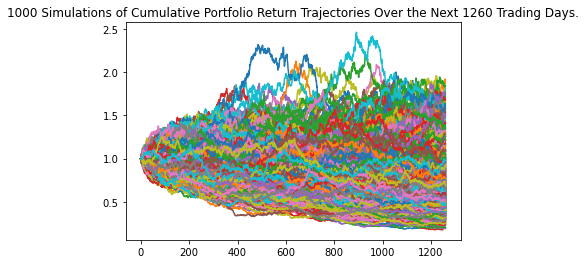

In [29]:
# Visualize the Monte Carlo simulation for a majority weight in Exxon
# by creating an overlay line plot
exxon_line_plot = MC_exxon.plot_simulation()

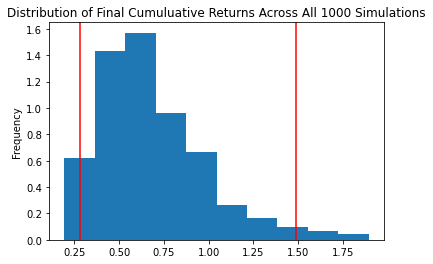

In [30]:
# Visualize the Monte Carlo simulation for a majority weight in Exxon
# by creating a histogram
exxon_dist_plot = MC_exxon.plot_distribution()

In [31]:
# Generate the summary statistics for the Monte Carlo simulation with
# majority weight in Exxon
# Save the summary statistics information in a variable called nexxontable 
exxon_table = MC_exxon.summarize_cumulative_return()

# Print summary statistics
print(exxon_table)

count           1000.000000
mean               0.683966
std                0.299394
min                0.193367
25%                0.467876
50%                0.628560
75%                0.840735
max                1.893952
95% CI Lower       0.280162
95% CI Upper       1.487139
Name: 1260, dtype: float64


In [32]:
# Using the lower and upper `95%` confidence interval values 
# (index positions 8 & 9 from the exxon_table),
# calculate  the range of the possible outcomes for a $15,000 investment 
exxon_ci_lower = round(exxon_table[8]*15000,2)
exxon_ci_upper = round(exxon_table[9]*15000,2)

# Print results
# Print results
print(f"There is a 95% chance that an initial investment of $15,000 in the portfolio"
      f" with a 60% weight in Exxon over the next 5 years will end within in the range of"
      f" ${exxon_ci_lower} and ${exxon_ci_upper}.")

There is a 95% chance that an initial investment of $15,000 in the portfolio with a 60% weight in Exxon over the next 5 years will end within in the range of $4202.44 and $22307.09.


## Step 15: Review all four simulated portfolios, and determine which set of investments gives you the best chance of a profit. In your notebook, write which portfolio you choose, and why.

In [33]:
# Even weighted stocks
print("Even weighted stocks")
print(f"There is a 95% chance that an initial investment of $15,000 in the portfolio"
      f" with an even weight over the next 5 years will end within in the range of"
      f" ${even_ci_lower} and ${even_ci_upper}.")
print("------------")

# 60% for AT&T
print("60% for AT&T")
print(f"There is a 95% chance that an initial investment of $15,000 in the portfolio"
      f" with a 60% weight in AT&T over the next 5 years will end within in the range of"
      f" ${att_ci_lower} and ${att_ci_upper}.")
print("------------")

# 60% for Nike
print("60% for Nike")
print(f"There is a 95% chance that an initial investment of $15,000 in the portfolio"
      f" with a 60% weight in Nike over the next 5 years will end within in the range of"
      f" ${nike_ci_lower} and ${nike_ci_upper}.")
print("------------")

# 60% for Exxon
print("60% for Exxon")
print(f"There is a 95% chance that an initial investment of $15,000 in the portfolio"
      f" with a 60% weight in Exxon over the next 5 years will end within in the range of"
      f" ${exxon_ci_lower} and ${exxon_ci_upper}.")
print("------------")

Even weighted stocks
There is a 95% chance that an initial investment of $15,000 in the portfolio with an even weight over the next 5 years will end within in the range of $6718.06 and $26811.51.
------------
60% for AT&T
There is a 95% chance that an initial investment of $15,000 in the portfolio with a 60% weight in AT&T over the next 5 years will end within in the range of $5634.84 and $24804.02.
------------
60% for Nike
There is a 95% chance that an initial investment of $15,000 in the portfolio with a 60% weight in Nike over the next 5 years will end within in the range of $8474.95 and $47290.06.
------------
60% for Exxon
There is a 95% chance that an initial investment of $15,000 in the portfolio with a 60% weight in Exxon over the next 5 years will end within in the range of $4202.44 and $22307.09.
------------


**Question:** Based on the above information, which set of investments gives you the best chance of a profit?

**Answer:** Looking across all four simulations, the portfolio breakdown with the greatest chance of success looks to be the portfolio with a majority of Nike stock. Although all four portfolios have a chance to lose money, the Nike portfolio is roughly the same level of risk with far more upside potential.